In [23]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib import pyplot, pylab
from scipy import optimize
from sklearn import model_selection, datasets, metrics, neighbors
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1) Метод k ближайших соседей

In [25]:
X = datasets.make_classification(n_samples=500, n_features =2, n_informative = 2, 
                                                      n_classes = 4, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [26]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X[0], 
                                                                                     X[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [27]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [28]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = ListedColormap(['red', 'blue', 'yellow', 'green']),
                          light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightgreen'])):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

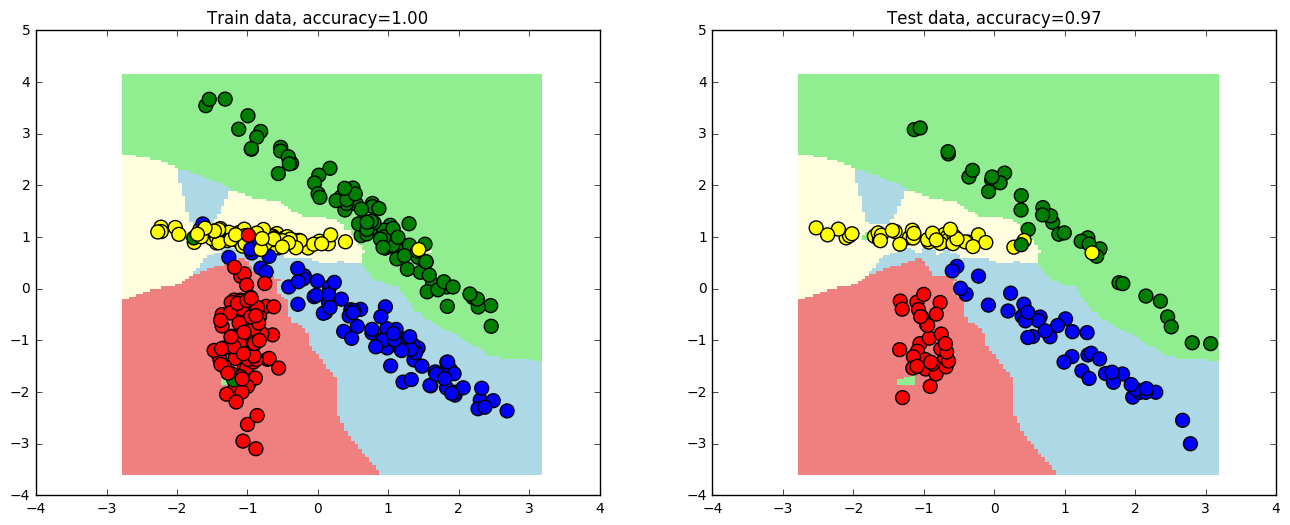

In [29]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

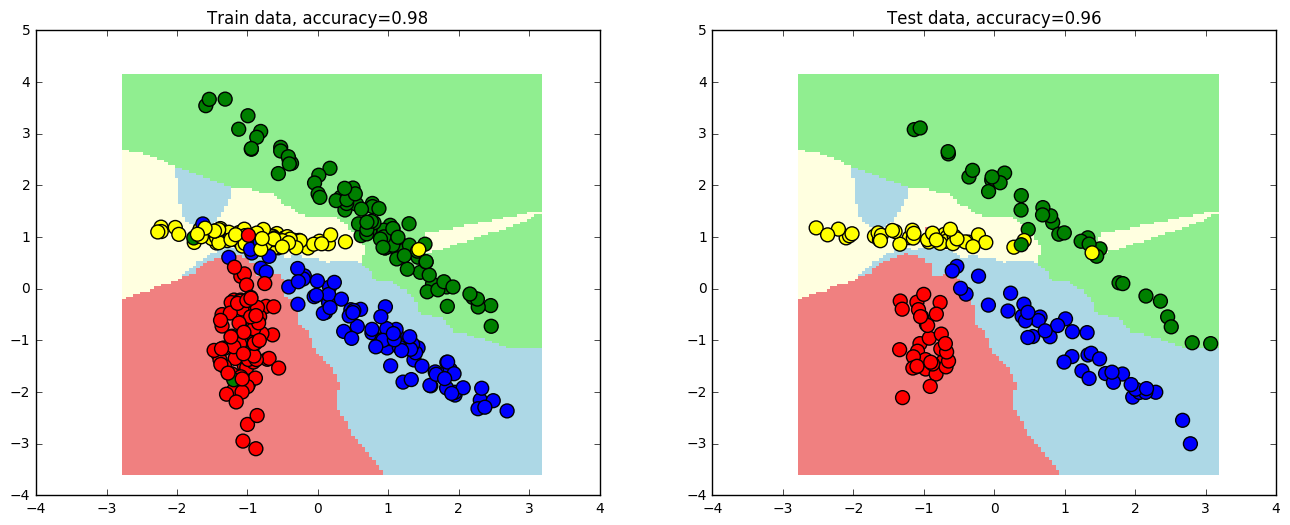

In [30]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

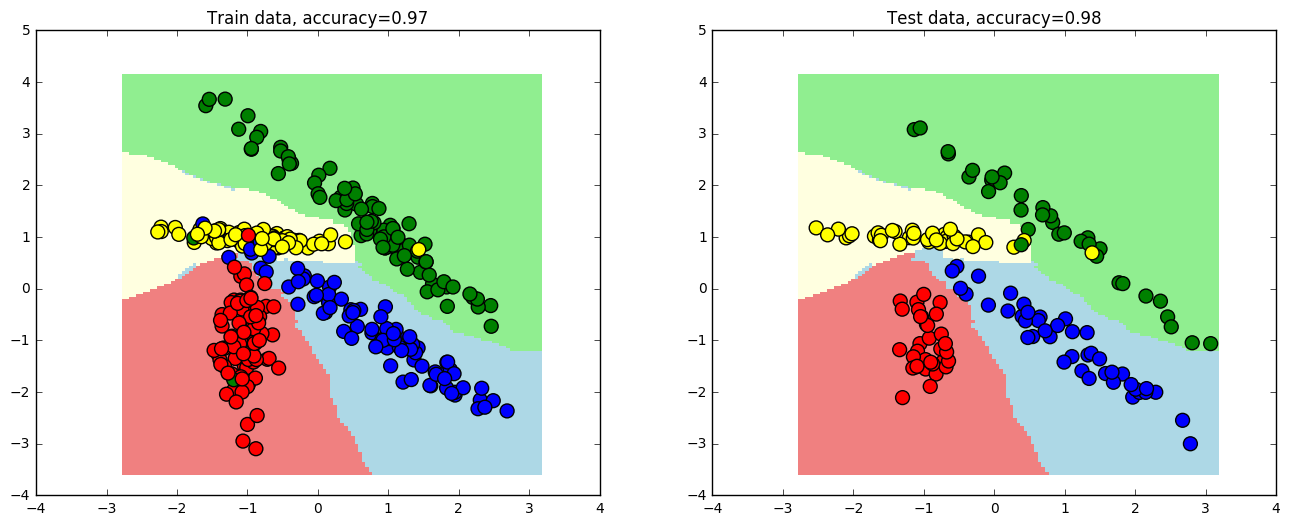

In [31]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

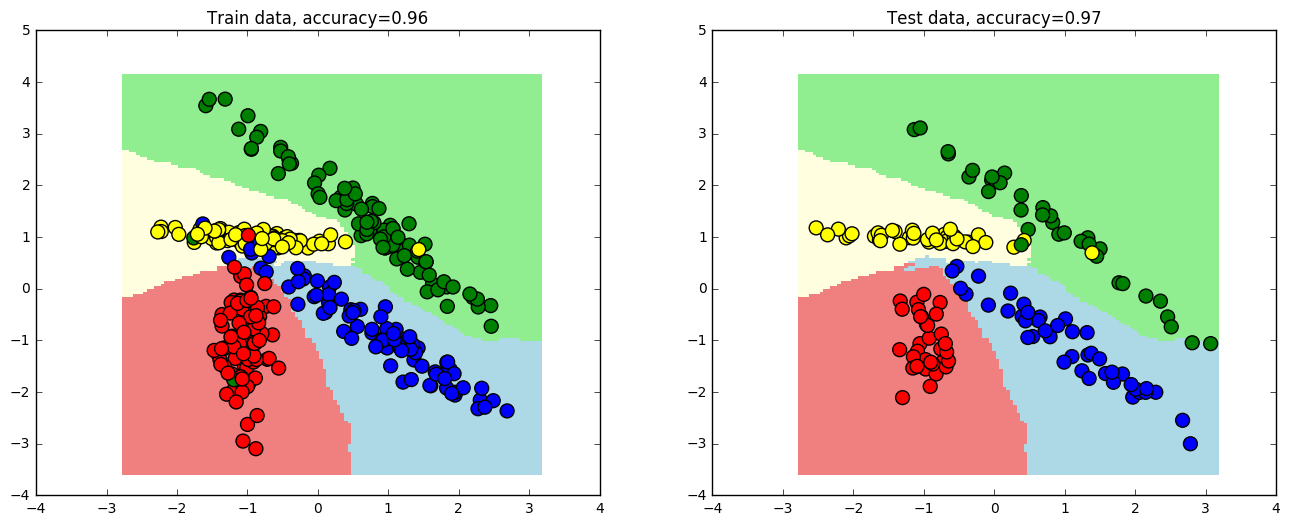

In [32]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

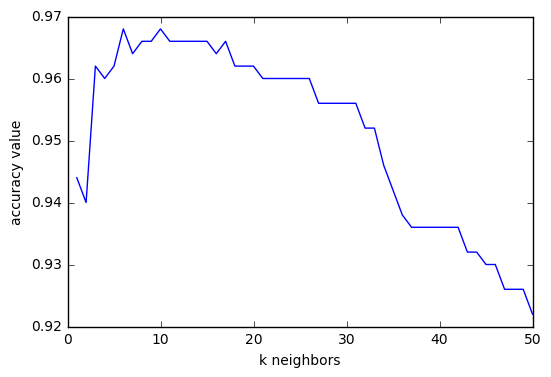

In [33]:
acc = np.zeros(50)
kf = model_selection.KFold(n_splits = 5)
for i in range(0,50):
    acc[i] = model_selection.cross_val_score(estimator=neighbors.KNeighborsClassifier(n_neighbors=i+1)
                                              ,X=X[0], y=X[1],cv=kf).mean()
pylab.plot(range(1,51), acc)
pyplot.xlabel("k neighbors")
pyplot.ylabel("accuracy value")

In [34]:
print "Estimator with", np.argmax(acc), "neighbors has the best accuracy"

Estimator with 5 neighbors has the best accuracy


# 2) Наивный байесовский классификатор

In [35]:
digits = datasets.load_digits()
breast_cancer = datasets.load_breast_cancer()

In [36]:
digits.data[0:5]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
         11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
          0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
          0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
         16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
          0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.],
       [  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.,   0.,   0.,   3.,
         16.,  15.,  14.,   0.,   0.,   0.,   0.,   8.,  13.

In [37]:
breast_cancer.data[0:5]

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
          1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
          3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
          7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
          8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
          4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
          3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
          1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
          1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02,
          1.32600000e+03,   8.47400000e-02,   7.86400000e-02,
          8.69000000e-02,   7.01700000e-02,   1.81200000e-01,
          5.66700000e-02,   5.43500000e-01,   7.33900000e-01,
          3.39800000e+00,   7.40800000e+01,   5.22500000e-03,
          1.30800000e-02,   1.86000000e-02,   1.34000000e-02,
       

In [38]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

## BernoulliNB

In [39]:
clf_digits = BernoulliNB()
clf_bc = BernoulliNB()

In [40]:
model_selection.cross_val_score(estimator=clf_digits,X = digits.data,y = digits.target).mean()

0.82582365077805819

In [41]:
model_selection.cross_val_score(estimator=clf_bc,X = breast_cancer.data,y = breast_cancer.target).mean()

0.62742040285899936

## MultinomialNB

In [42]:
clf_digits = MultinomialNB()
clf_bc = MultinomialNB()

In [43]:
model_selection.cross_val_score(estimator=clf_digits,X = digits.data,y = digits.target).mean()

0.87087714897350532

In [44]:
model_selection.cross_val_score(estimator=clf_bc,X = breast_cancer.data,y = breast_cancer.target).mean()

0.89457904019307521

## GaussianNB

In [45]:
clf_digits = GaussianNB()
clf_bc = GaussianNB()

In [46]:
model_selection.cross_val_score(estimator=clf_digits,X = digits.data,y = digits.target).mean()

0.81860038035501381

In [47]:
model_selection.cross_val_score(estimator=clf_bc,X = breast_cancer.data,y = breast_cancer.target).mean()

0.9367492806089297

## Answers

1. The best result on breast_cancer was shown by GauissianNB
2. The best result on digits was 0.87087714897350532
3. (d)

# 3) Метрики в задаче регрессии

In [48]:
X = np.arange(-10, 10, 20.0/500)
noise = np.random.normal(0,0.2, 500)

In [49]:
y = 1 + 0.5*X + noise

In [50]:
data = np.column_stack((X,y)).T

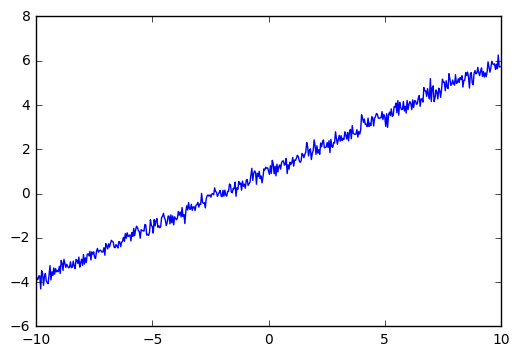

In [51]:
pyplot.plot(data[0], data[1])

In [52]:
def f(coeff):
    return metrics.mean_squared_error(coeff[0] + coeff[1]*data[0], data[1])

In [53]:
mse_opt_res = optimize.minimize(f, [1,1])

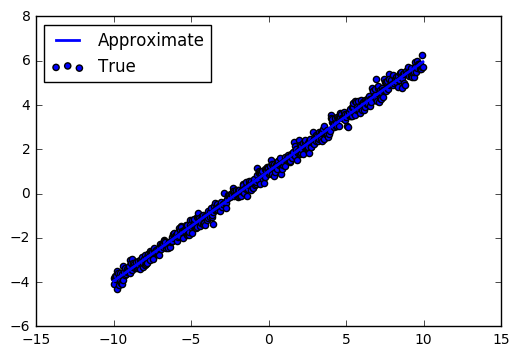

In [54]:
pyplot.plot(data[0], mse_opt_res.x[0] + mse_opt_res.x[1]*data[0], linewidth=2)
pyplot.scatter(data[0],data[1])

pyplot.legend(['Approximate', 'True'], loc=2)

In [55]:
X_1 = np.append(X, np.random.normal(0,3, 75))
y_1 = np.append(y, -1 + np.random.normal(0, 0.2, 75))

In [56]:
data_1 = np.column_stack((X_1,y_1)).T

In [57]:
def MSE_min_f(coeff):
    return metrics.mean_squared_error(coeff[0] + coeff[1]*data_1[0], data_1[1])

In [58]:
def MAE_min_f(coeff):
    return metrics.mean_absolute_error(coeff[0] + coeff[1]*data_1[0], data_1[1])

In [59]:
mse_opt_res = optimize.minimize(MSE_min_f, [1,1])
mae_opt_res = optimize.minimize(MAE_min_f, [1,1])

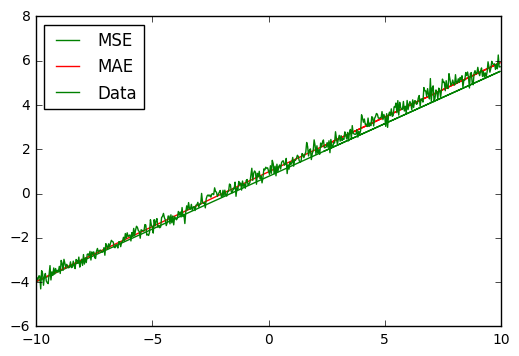

In [60]:
pyplot.plot(data_1[0], mse_opt_res.x[0] + mse_opt_res.x[1]*data_1[0], color='green')
pyplot.plot(data_1[0], mae_opt_res.x[0] + mae_opt_res.x[1]*data_1[0], color='red')
pyplot.plot(data[0], data[1], color='green')
pyplot.legend(['MSE','MAE', 'Data'], loc=2)

На основании графиков, можно сделать вывод, что обе модели устойчивы к выбросам.
Однако модель, основанная на MAE, показала лучшие результаты, чем модель, основанная на MSE.

# 4) Применение решающего дерева

In [2]:
headers = ['Status of existing checking account',  'Duration in month',
                                                   'Credit history',
                                                   'Purpose',
                                                   'Credit amount',
                                                   'Savings account/bonds',
                                                   'Present employment since',
                                                   'Installment rate in percentage of disposable income',
                                                   'Personal status and sex',
                                                   'Other debtors / guarantors',
                                                   'Present residence since',
                                                   'Property',
                                                   'Age in years',
                                                   'Other installment plans ',
                                                   'Housing',
                                                   'Number of existing credits at this bank',
                                                   'Job',
                                                   'Number of people being liable to provide maintenance for',
                                                   'Telephone',
                                                   'foreign worker',
                                                   'target']

In [3]:
data = pd.read_csv("german.data", sep=' ', header=None)
data.columns = headers

In [4]:
categorical=['Status of existing checking account',  'Credit history', 'Purpose', 'Savings account/bonds',  'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 'Property', 'Other installment plans ', 'Housing', 'Job', 'Telephone', ]

In [5]:
data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
X = data.drop(['target'], axis=1)
y=data['target']

In [7]:
X = pd.get_dummies(X)

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [9]:
tree = DecisionTreeClassifier()

In [10]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [11]:
metrics.accuracy_score(tree.predict(X_test), y_test)

0.68000000000000005

In [12]:
export_graphviz(tree)

C:\Users\Maxim\Anaconda2\lib\site-packages\sklearn\tree\export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


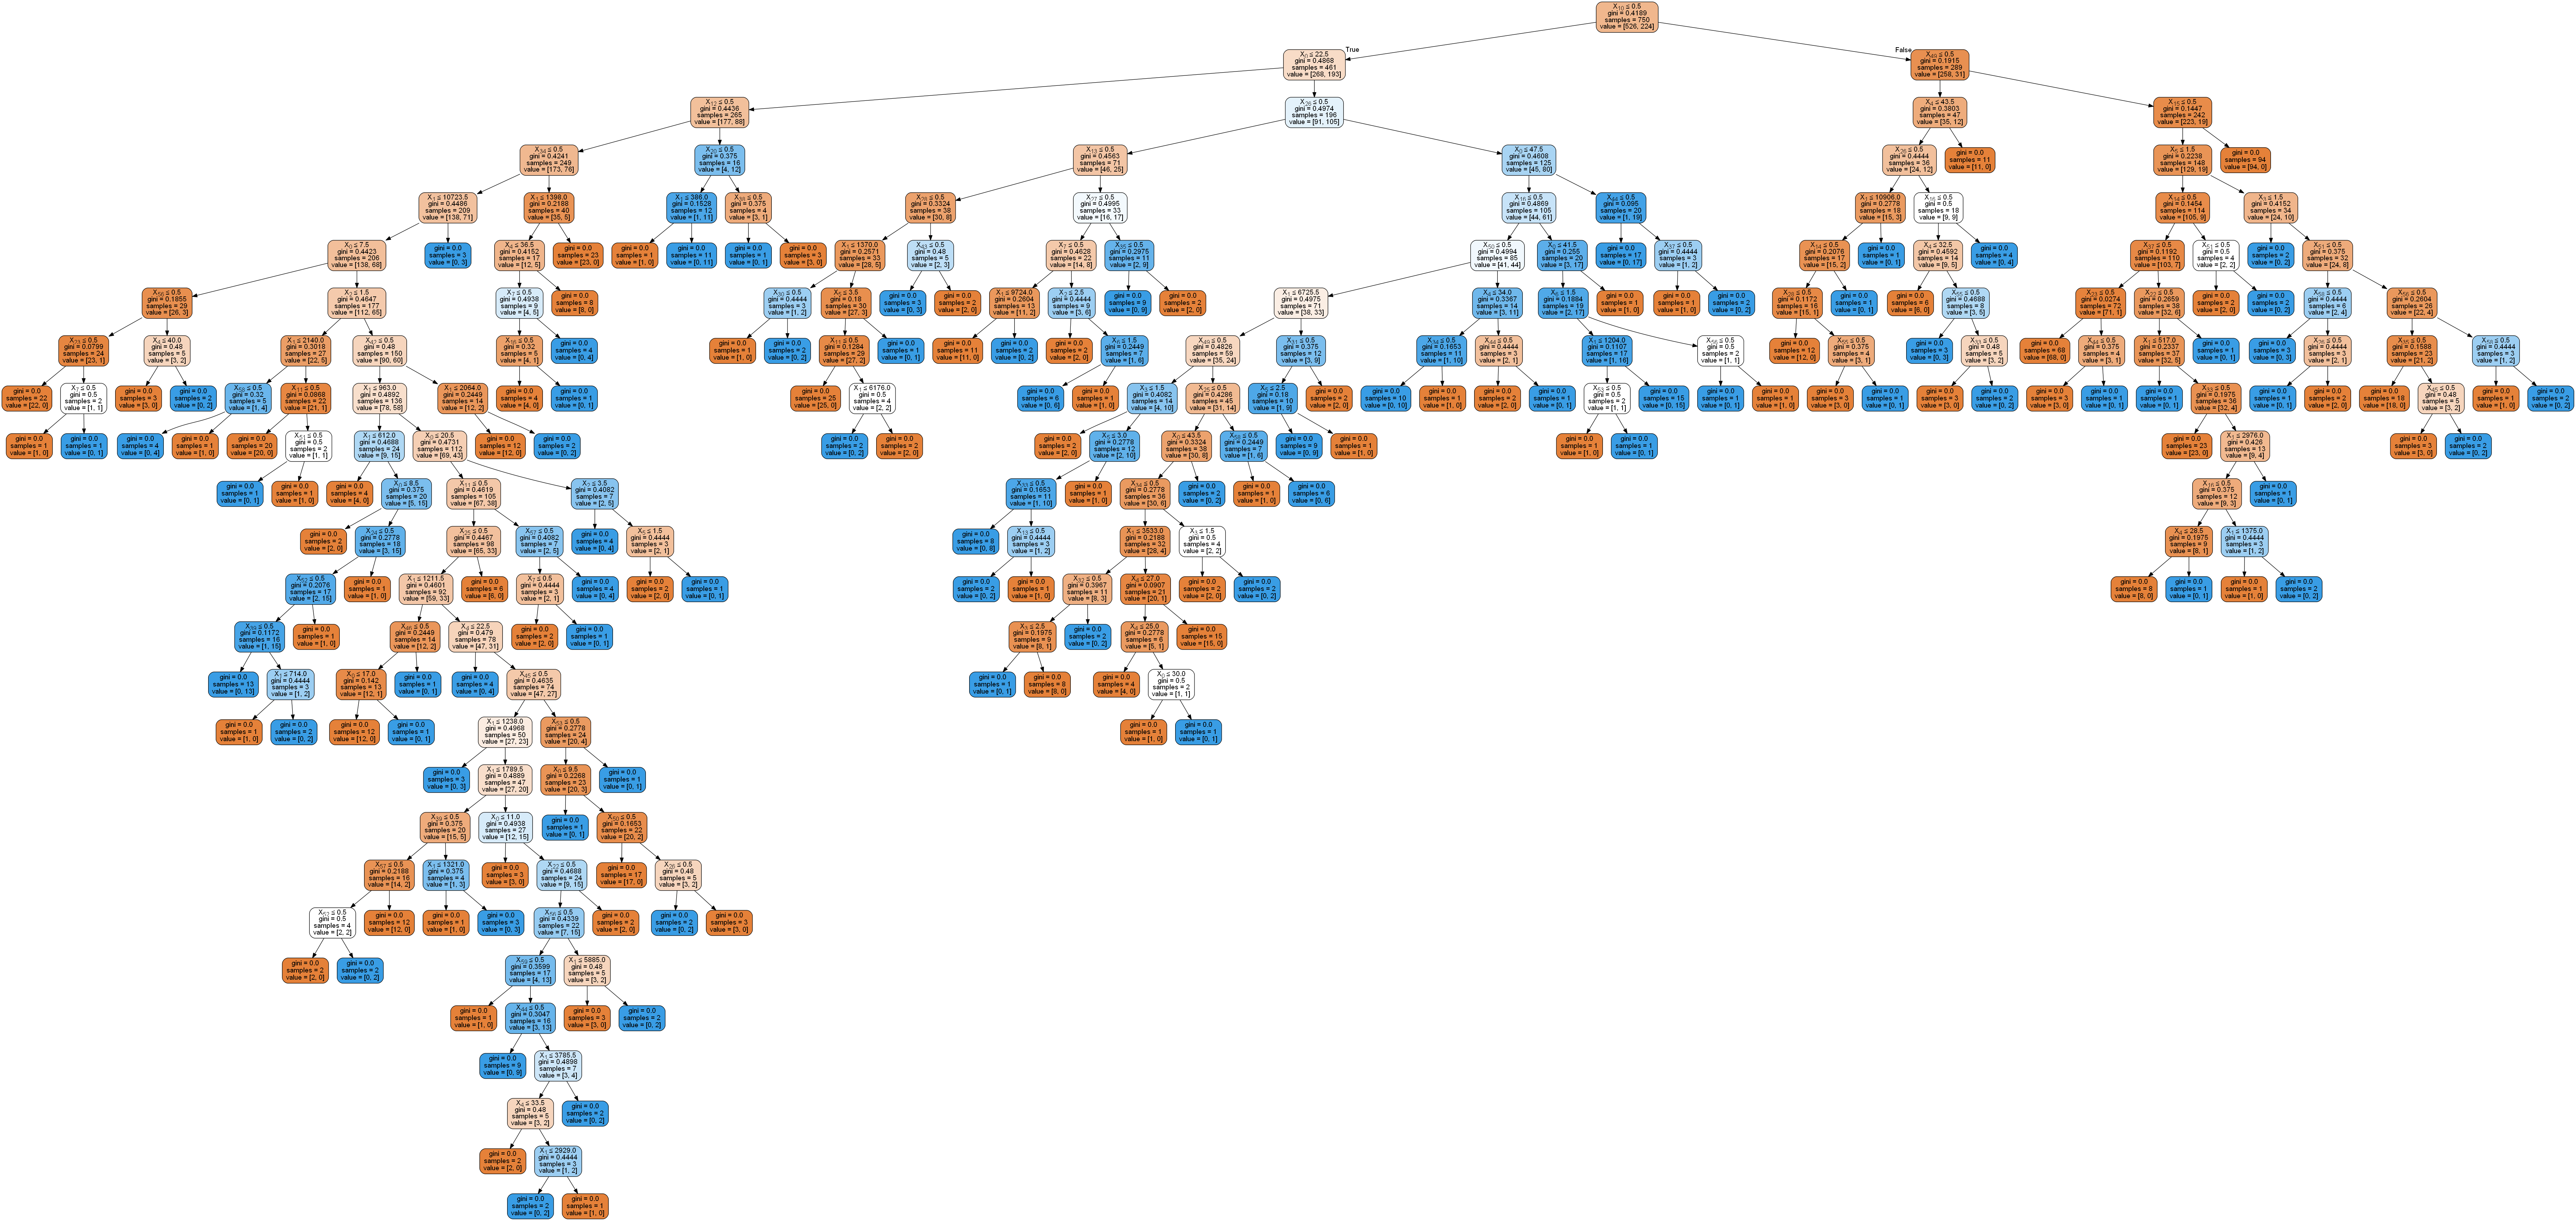

In [13]:
from IPython.display import Image 
from StringIO import StringIO
import pydotplus
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [17]:
X.columns[10]

'Status of existing checking account_A14'

В данном построении самое первое разбиение составилоась по принципу наличия счёта

In [20]:
depths = np.arange(1,50)
qualities = map(lambda i: model_selection.cross_val_score(DecisionTreeClassifier(max_depth=i), X, y).mean(), depths)

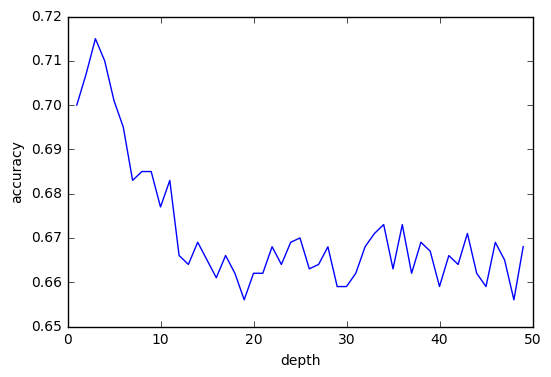

In [65]:
pyplot.plot(depths,qualities)
pyplot.xlabel('depth')
pyplot.ylabel('accuracy')